
# Homework 11: PARKING TICKETS


### 1. I want to make sure my Plate ID is a string. Can't lose the leading zeroes!
### 2. I don't think anyone's car was built in 0AD. Discard the '0's as NaN.
### 3. I want the dates to be dates! Read the read_csv documentation to find out how to make pandas automatically parse dates.

In [1]:
import pandas as pd
dates=['Issue Date', 'Vehicle Expiration Date'] #Importing dates as datetime
col_types={'Plate ID': 'str','Date First Observed':'str'} #Importing Plate ID and the Date First Observed as a string, because it has to be made into a time by a function. 

In [2]:
df=pd.read_csv("small-violations.csv",dtype=col_types,parse_dates=dates,na_values={'Date First Observed'==0,'Vehicle Expiration Date'==88888888,88888888.0,88880088},infer_datetime_format=True)

c:\users\harsha devulapalli\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (17,18,20,21,22,23,29,30,31,32,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.dtypes #Finding out if our datatype import has worked or not.

Summons Number                                int64
Plate ID                                     object
Registration State                           object
Plate Type                                   object
Issue Date                           datetime64[ns]
Violation Code                              float64
Vehicle Body Type                            object
Vehicle Make                                 object
Issuing Agency                               object
Street Code1                                float64
Street Code2                                float64
Street Code3                                float64
Vehicle Expiration Date                      object
Violation Location                          float64
Violation Precinct                          float64
Issuer Precinct                             float64
Issuer Code                                 float64
Issuer Command                               object
Issuer Squad                                 object
Violation Ti

In [4]:
df.columns #Identifying all the columns of the dataframe.

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

## 4. "Date first observed" is a pretty weird column, but it seems like it has a date hiding inside. Using a function with .apply, transform the string (e.g. "20140324") into a Python date. Make the 0's show up as NaN.

In [5]:
## WRITING A FUNCTION TO CONVERT STRING INTO A DATE

def string_to_date(string):
    from dateutil import parser
    if pd.isnull(string):
        return None
    else:
        dt = parser.parse(string)
        return dt.date()

In [6]:
string_to_date('20160808') #Testing it out. 

datetime.date(2016, 8, 8)

In [7]:
df['Date First Observed']= df['Date First Observed'].apply(string_to_date) #Applying it to the dataframe column

## 5. "Violation time" is... not a time. Make it a time.

In [8]:
def string_to_time(string): #CONVERTING THE VIOLATION TIME STRING INTO TIME
    from dateutil import parser
    import re
    if pd.isnull(string):
        return None
    if string =='Nan' or string =='nan' or string =='0':
        return None
    if string[0:4].isnumeric()==True:
        if int(string[0:2]) <=12 and int(string[2:4])<=59:
            regex=re.search(r"\d\d\d\d[AaPp]",string)
            if regex:
                time=string[0:2]+":"+string[2:4]+" "+string[4]+"M"
                return parser.parse(time).time()
            else:
                return None

In [9]:
def float_to_int(float): #THE VIOLATION CODE COLUMN IS ACTUALLY A FLOAT, SO WE'RE CONVERTING INTO AN INTEGER FIRST. 
    if pd.isnull(float):
        return None
    else:
         return int(float)

In [10]:
df['Violation Code']=df['Violation Code'].apply(float_to_int)

In [11]:
df['Violation Time']=df['Violation Time'].apply(string_to_time)

In [12]:
df['Violation Time'].head() #TESTING IF IT WORKED

0    07:52:00
1    12:40:00
2    12:43:00
3    14:32:00
4    12:39:00
Name: Violation Time, dtype: object

## 6, There sure are a lot of colors of cars, too bad so many of them are the same. Make "BLK" and "BLACK", "WT" and "WHITE", and any other combinations that you notice.

In [13]:
df['Vehicle Color'].value_counts() #LOOKING AT COLORS IN THE ORIGINAL DATASET

WHITE    149076
WH       132446
GY       123169
BK        96899
BLACK     71865
BL        46399
GREY      46237
BLUE      35237
SILVE     34335
BROWN     31801
RED       31768
RD        28920
GR        21184
GREEN     16673
TN        13939
BLK        9342
BR         8893
OTHER      8751
TAN        8421
YW         8144
GRAY       7620
GOLD       6546
WHT        5989
GL         5758
YELLO      5179
GRY        3521
MR         3114
WT         2286
BRN        2146
ORANG      1652
          ...  
NY            1
WITH          1
GR/BL         1
FLORI         1
GOLDT         1
DK-TN         1
PEAR          1
BURQU         1
GLW           1
BLUGR         1
LABLU         1
RUBY          1
BRWB          1
BRNZ          1
BLAKE         1
SW            1
GR/WH         1
BULE          1
CNY           1
NAVYB         1
METBL         1
NNHE          1
IL            1
TEN           1
B/R           1
CHAPI         1
GOL/S         1
SIK           1
FL            1
WHIOT         1
Name: Vehicle Color, dty

In [14]:
df['Vehicle Color'] = df['Vehicle Color'].replace(['WHT', 'WH','WT','WHI'], 'WHITE')

In [15]:
df['Vehicle Color'] = df['Vehicle Color'].replace(['GRAY', 'GY','GRY'], 'GREY')

In [16]:
df['Vehicle Color'] = df['Vehicle Color'].replace(['BLK', 'BK'], 'BLACK')

In [17]:
df['Vehicle Color'] = df['Vehicle Color'].replace('BL', 'BLUE')

In [18]:
df['Vehicle Color'] = df['Vehicle Color'].replace(['BR', 'BN','BRWN'], 'BROWN')

In [19]:
df['Vehicle Color'] = df['Vehicle Color'].replace('RD', 'RED')

In [20]:
df['Vehicle Color'] = df['Vehicle Color'].replace(['GR', 'GN','GRN'], 'GREEN')

In [21]:
df['Vehicle Color'] = df['Vehicle Color'].replace('TN', 'TAN')

In [22]:
df['Vehicle Color'] = df['Vehicle Color'].replace('GL', 'GOLD')

In [23]:
df['Vehicle Color'] = df['Vehicle Color'].replace('BRN', 'BROWN')

In [24]:
df['Vehicle Color'] = df['Vehicle Color'].replace(['YW', 'YELLO','YELL'], 'YELLOW')

In [25]:
df['Vehicle Color'] = df['Vehicle Color'].replace(['BL', 'BLU'], 'BLUE')

In [26]:
df['Vehicle Color'] = df['Vehicle Color'].replace('MR', 'MAROON')

In [27]:
df['Vehicle Color'] = df['Vehicle Color'].replace(['SIL', 'SILVR','SILVE','SILV'], 'SILVER')

In [28]:
df['Vehicle Color'] = df['Vehicle Color'].replace(['OR', 'ORANG'], 'ORANGE')

In [29]:
df['Vehicle Color'].value_counts() #LOOKING AT THE COLORS AFTER CLEANING UP, MUCH BETTER!

WHITE     290458
GREY      180547
BLACK     178106
BLUE       82534
RED        60688
BROWN      43890
GREEN      39536
SILVER     36460
TAN        22360
YELLOW     13520
GOLD       12304
OTHER       8751
MAROON      3114
ORANGE      2873
LTG         1325
SL          1214
PURPL        963
LT/          634
DKG          622
DK/          537
PR           476
DKB          358
BEIGE        272
BLG          257
W            255
LTGY         233
BRW          207
LAVEN        206
MAROO        191
NOC          166
           ...  
CHRYS          1
BLU/G          1
BKACK          1
BT             1
GRY/G          1
NY             1
GR/BL          1
FLORI          1
GOLDT          1
PEAR           1
NNHE           1
FL             1
SIK            1
GOL/S          1
LTW            1
RUBY           1
BRNZ           1
BLAKE          1
SW             1
GR/WH          1
BULE           1
CNY            1
NAVYB          1
BRWB           1
METBL          1
IL             1
TEN            1
B/R           

## 7. Join the data with the Parking Violations Code dataset from the NYC Open Data site.


In [30]:
#READING PARKING VIOLATION CODES FROM NYC DATASET
codesdf=pd.read_csv("DOF_Parking_Violation_Codes.csv",dtype={'Manhattan\xa0 96th St. & below':int, 'All Other Areas': int}) 

In [31]:
codesdf.columns

Index(['CODE', 'DEFINITION', 'Manhattan  96th St. & below', 'All Other Areas'], dtype='object')

In [32]:
codesdf['Manhattan\xa0 96th St. & below'].value_counts() #CHECKING IF THE IMPORT WORKED WELL

65     36
115    29
95     11
60      2
100     1
180     1
50      1
165     1
265     1
0       1
Name: Manhattan  96th St. & below, dtype: int64

In [33]:
newdf=df.join(codesdf, on='Violation Code', how='left') #MERGING THE TWO DATAFRAMES INTO A NEW DATAFRAME Unimaginatively CALLED NEWDF

In [34]:
newdf.head() #DID IT WORK? SEEMS TO HAVE, THE NANS IN THE END OF THIS FRAME ARE THERE IN THE ORIGINAL ONE TOO. 

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas
0,1283294138,GBB9093,NY,PAS,2013-08-04,46.0,SUBN,AUDI,P,37250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,62,Standing or parking a vehicle beyond markings ...,65.0,45.0
1,1283294151,62416MB,NY,COM,2013-08-04,46.0,VAN,FORD,P,37290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,62,Standing or parking a vehicle beyond markings ...,65.0,45.0
2,1283294163,78755JZ,NY,COM,2013-08-05,46.0,P-U,CHEVR,P,37030.0,...,NaN,NaN,NaN,NaN,NaN,NaN,62,Standing or parking a vehicle beyond markings ...,65.0,45.0
3,1283294175,63009MA,NY,COM,2013-08-05,46.0,VAN,FORD,P,37270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,62,Standing or parking a vehicle beyond markings ...,65.0,45.0
4,1283294187,91648MC,NY,COM,2013-08-08,41.0,TRLR,GMC,P,37240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,57,Parking a vehicle within the area designated a...,65.0,65.0


In [35]:
newdf.columns #THE NEW COLUMNS SEEM TO HAVE BEEN ADDED

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation', 'CODE', 'DEFINITION',
       '

## 8. How much money did NYC make off of parking violations?

In [36]:
newdf['Violation County'].value_counts() #LET US SEE THE VIOLATION COUNTY DATA, THIS NEEDS TO BE CLEANED UP A BIT

NY       392873
K        216562
Q        193612
BX        94041
R          9454
KINGS         1
RICH          1
BRONX         1
Name: Violation County, dtype: int64

In [37]:
newdf['Violation County'] = newdf['Violation County'].replace('BX', 'BRONX')

In [38]:
newdf['Violation County'] = newdf['Violation County'].replace(['R', 'RICH'], 'RICHMOND')

In [39]:
newdf['Violation County'] = newdf['Violation County'].replace('K', 'KINGS')

In [40]:
newdf['Violation County'].value_counts() #ALL CLEANED

NY          392873
KINGS       216563
Q           193612
BRONX        94042
RICHMOND      9455
Name: Violation County, dtype: int64

Now, we know the locations of the violation and from the merged dataset we know that there the fine rates vary upon the location of the violation, with certain rates for everything under 96th street in Manhattan and other rates for elsewhere. So using the Violation County numbers, and the assumption that NY county is everything under 96th - we calculate. 

In [41]:
manhattanviolations=newdf[newdf['Violation County']=='NY']

In [42]:
#FINES COLLECTED IN MANHATTAN
manhattanviolations['Manhattan\xa0 96th St. & below'].sum() 

38633190.0

In [43]:
allotherviolations=newdf[newdf['Violation County']!= 'NY']

In [44]:
#FINES NOT COLLECTED IN MANHATTAN

allotherviolations['All Other Areas'].sum()

48133905.0

In [45]:
#FINES COLLECTED IN ALL OF NYC
manhattanviolations['Manhattan\xa0 96th St. & below'].sum()+allotherviolations['All Other Areas'].sum()

86767095.0

## 9. What's the most lucrative kind of parking violation? The most frequent?


In [46]:
newdf['Manhattan\xa0 96th St. & below'].value_counts()
#IT IS EVIDENT THAT THE 265 DOLLARS IS THE MOST LUCRATIVE FINE in terms of monetary amount, but 115 DOlLARS IS THE MOST COMMON

115.0    482727
65.0     407620
95.0      59637
180.0     24322
165.0      6976
0.0        1857
60.0       1482
265.0      1227
100.0       533
50.0         37
Name: Manhattan  96th St. & below, dtype: int64

In [47]:
lucrative=newdf[newdf['Manhattan\xa0 96th St. & below']==265]

In [48]:
lucrative['DEFINITION'].value_counts()
#TRACTOR TRAILER PARKING SEEMS TO MAKE MONIES

Parking a tractor-trailer on a residential street between 9PM and 5AM.    1227
Name: DEFINITION, dtype: int64

In [49]:
frequent=newdf['DEFINITION'].value_counts()
#IDENTIFYING THE MOST FREQUENT SETS OF VIOLATIONS

In [50]:
frequent.head() #THE TOP FIVE SETS OF VIOLATIONS

Expired Meter -- parking in a metered space where the meter works and the time has ended. Drivers get a 5-minute grace period past the expired time on Alternate Side Parking signs and any other parking spaces with specific times listed (i.e.. 8:30am - 9:30am). During the 5-minute grace period, parking tickets cannot be issued.    140329
Standing or parking in a safety zone, between a safety zone and the nearest curb, or within 30 feet of points on the curb immediately opposite the ends of a safety zone.                                                                                                                                                                   125716
Standing at a commuter van stop, other than temporarily for the purpose of quickly picking up or dropping off passengers.                                                                                                                                                                                                         

## 10. New Jersey has bad drivers, but does it have bad parkers, too? How much money does NYC make off of all non-New York vehicles?


In [51]:
nonnyviolations=newdf[newdf['Registration State']!= 'NY']

In [52]:
nonnymanhattanviolations=nonnyviolations[nonnyviolations['Violation County']=='NY']

In [53]:
nonnymanhattanviolations['Manhattan\xa0 96th St. & below'].sum()
#MONEY MADE BY NON NY VEHICLES IN MANHATTAN

11523570.0

In [54]:
nonnymanhattanviolations=nonnyviolations[nonnyviolations['Violation County']!='NY']

In [55]:
nonnymanhattanviolations['All Other Areas'].sum()
#MONEY MADE BY NON NY VEHICLES OUTSIDE MANHATTAN

10324830.0

In [56]:
nonnymanhattanviolations['Manhattan\xa0 96th St. & below'].sum()+nonnymanhattanviolations['All Other Areas'].sum()
#TOTAL MONEY MADE BY NON NY VEHICLES 

22184410.0

## 11. Make a chart of the top few.


In [57]:
import matplotlib.pyplot as plt

%matplotlib inline

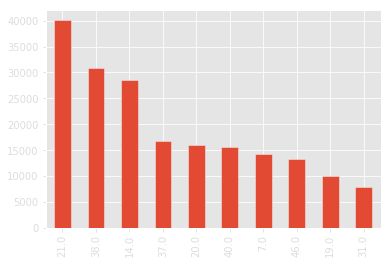

In [58]:
plt.style.use('ggplot')
toptenviolations=nonnyviolations['Violation Code'].value_counts()
toptenviolations.head(10).plot(kind='bar')
#I USE THE VIOLATION CODE INSTEAD OF ACTUAL VIOLATION NAME BECAUSE THE NAMES OF SOME OF THEM ARE TOO LONG. 

We can then inspect what 21,38,14 violation codes are. 

## 12. What time of day do people usually get their tickets? You can break the day up into several blocks - for example 12am-6am, 6am-12pm, 12pm-6pm, 6pm-12am.


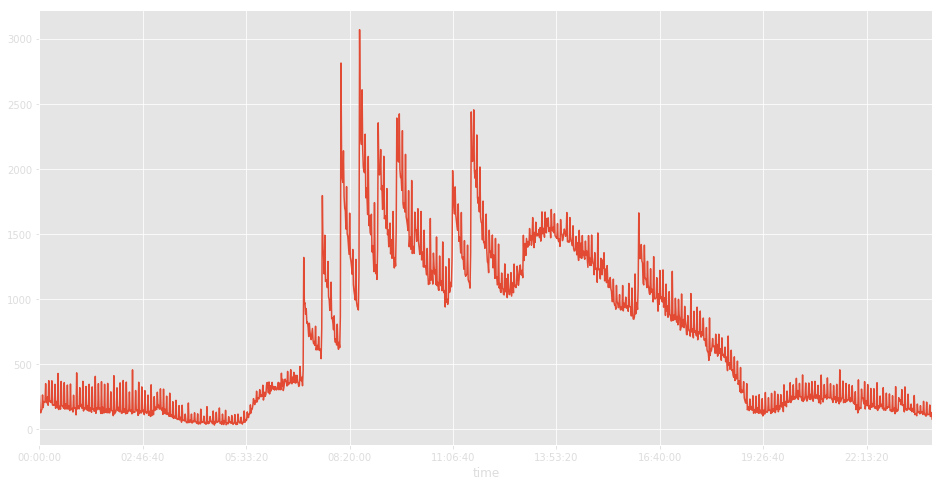

In [59]:
newdf['Violation Time'].value_counts().plot(figsize=(16, 8))

From the graph above, it is very evident that most people get tickets in the 6 AM to 12 PM ie the morning slot. More than any other segments of the day.

## 13. What's the average ticket cost in NYC?


In [60]:
newdf['Manhattan\xa0 96th St. & below'].describe()
#AVERAGE COST OF TICKETS IN MANHATTAN is 95 DOLALRS

c:\users\harsha devulapalli\appdata\local\programs\python\python35\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    986418.000000
mean         94.962425
std          28.902005
min           0.000000
25%                NaN
50%                NaN
75%                NaN
max         265.000000
Name: Manhattan  96th St. & below, dtype: float64

In [61]:
newdf['All Other Areas'].describe()
#AVERAGE COST OF TICKET ELSEWHERE IS 85 DOLLARS

c:\users\harsha devulapalli\appdata\local\programs\python\python35\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    986418.000000
mean         84.716996
std          40.356772
min           0.000000
25%                NaN
50%                NaN
75%                NaN
max         265.000000
Name: All Other Areas, dtype: float64

In [62]:
import numpy
a=[84.716996,94.962425]
numpy.mean(a)
#SO THE AVERAGE TICKET COST IN NEW YORK CITY IS ABOUT 90 DOLLARS

89.839710499999995

## 14. Make a graph of the number of tickets per day.


In [63]:
ticketsperday=newdf['Issue Date'].value_counts()

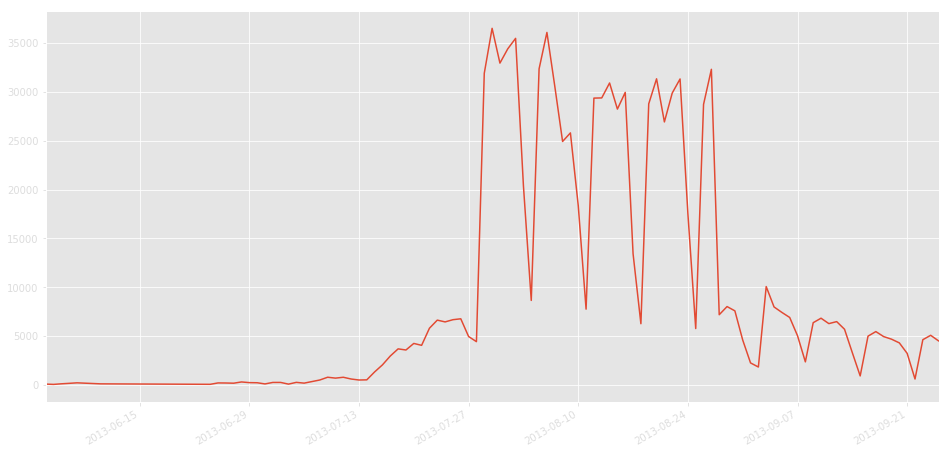

In [64]:
ticketsperday.head(100).plot(figsize=(16, 8))

Looks like, the month of August is when the Police seem to have gone on a fining spree. 

## 15. Make a graph of the amount of revenue collected per day.


<< Not too sure on how to get this done>> 

## 16. Manually construct a dataframe out of https://dmv.ny.gov/statistic/2015licinforce-web.pdf (only NYC boroughts - bronx, queens, manhattan, staten island, brooklyn), having columns for borough name, abbreviation, and number of licensed drivers.


In [84]:
driversdf=pd.read_csv("drivers.csv")

In [85]:
driversdf.head(6)

,County,Male,Female,Total,Borough Abbreviation
0,BRONX,259845,197002,456847,BRONX
1,KINGS,555917,427852,983769,KINGS
2,NEW YORK,399606,348977,748583,NEW YORK
3,QUEENS,631912,502152,1134064,QUEENS
4,RICHMOND,156339,147911,304250,RICHMOND
5,NYC,2003619,1623894,3627513,NYC


## 17. What's the parking-ticket in dollars-per-licensed-driver in each borough of NYC? Do this with pandas and the dataframe you just made, not with your head!

In [91]:
#MAKING DATAFRAMES FOR EACH OF THESE BOROUGHS/COUNTIES
bronxviolations=newdf[newdf['Violation County']=='BRONX']
brooklynviolations=newdf[newdf['Violation County']=='KINGS']
manhattanviolations=newdf[newdf['Violation County']=='NY']
queensviolations=newdf[newdf['Violation County']=='Q']
statenislandviolations=newdf[newdf['Violation County']=='RICHMOND']

In [97]:
#GETTING THE TOTAL NUMBER OF DRIVERS FROM THE NEW DATA FRAME
numberofdriversinbronx=driversdf.iloc[0]['Total']
numberofdriversinbrooklyn=driversdf.iloc[1]['Total']
numberofdriversinmanhattan=driversdf.iloc[2]['Total']
numberofdriversinqueens=driversdf.iloc[3]['Total']
numberofdriversinstatenisland=driversdf.iloc[4]['Total']


In [98]:
bronxviolations['All Other Areas'].sum()/numberofdriversinbronx #AVERAGE PARKING TICKET PER DRIVER IN BRONX

14.477724489818254

In [99]:
brooklynviolations['All Other Areas'].sum()/numberofdriversinbrooklyn #AVERAGE PARKING TICKET PER DRIVER IN BROOKLYN

16.182579447004326

In [100]:
manhattanviolations['Manhattan\xa0 96th St. & below'].sum()/numberofdriversinmanhattan #AVERAGE PARKING TICKET PER DRIVER IN MANHATTAN

51.608425518613167

In [101]:
queensviolations['All Other Areas'].sum()/numberofdriversinqueens #AVERAGE PARKING TICKET PER DRIVER IN QUEENS

13.185256740360332

In [102]:
statenislandviolations['All Other Areas'].sum()/numberofdriversinstatenisland #AVERAGE PARKING TICKET PER DRIVER IN STATEN ISLAND

2.2674281018898932